In [1]:
# add path (for local)
import sys
repo_root = "../../"
if repo_root not in sys.path:
    sys.path.insert(0, repo_root)

In [8]:
import pandas as pd
from utils import max_gauss, min_gauss, rectangular

df = pd.read_csv("../generation_result/temp.csv")
# print(df.head())

def step(x, threshold):
    if x >= threshold:
        return 1
    else:
        return 0

def scale_objective_value(params, value):
    scaling = params['scaler']
    if scaling == 'max_gauss':
        return max_gauss(value, 1.0, params['mu'], params['sigma'])
    elif scaling == 'min_gauss':
        return min_gauss(value, 1.0, params['mu'], params['sigma'])
    elif scaling == 'step':
        return step(value, params['threshold'])
    elif scaling == "rectangular":
        return rectangular(value, params["min"], params["max"])
    elif scaling == 'identity':
        return value
    else:
        raise ValueError("Set the scaling function from one of 'max_gauss', 'min_gauss', 'rectangular', 'inverted_step' or 'identity'")

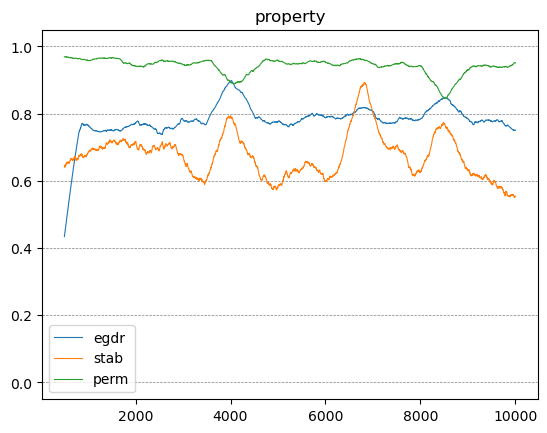

In [9]:
import matplotlib.pyplot as plt
from utils import moving_average

# Property

window = 0.05
linewidth = 0.8
x = df["order"]

fig, ax = plt.subplots()
for ytick in ax.get_yticks():
    ax.axhline(y=ytick, color='gray', linestyle='--', linewidth=0.5)
    
property_egfr = {"scaler": "max_gauss", "mu": 9, "sigma": 2, "weight": 1}
property_stab = {"scaler": "max_gauss", "mu": 75, "sigma": 20, "weight": 1}
property_perm = {"scaler": "max_gauss", "mu": 1, "sigma": 1, "weight": 1}

y1 = df["egfr"]
y1 = [scale_objective_value(property_egfr, v) for v in y1]
plt.plot(x, moving_average(y1, window), label="egdr", linewidth=linewidth)

y2 = df["stab"]
y2 = [scale_objective_value(property_stab, v) for v in y2]
plt.plot(x, moving_average(y2, window), label="stab", linewidth=linewidth)

y3 = df["perm"]
y3 = [scale_objective_value(property_perm, v) for v in y3]
plt.plot(x, moving_average(y3, window), label="perm", linewidth=linewidth)


plt.title("property")
plt.legend()
plt.show()

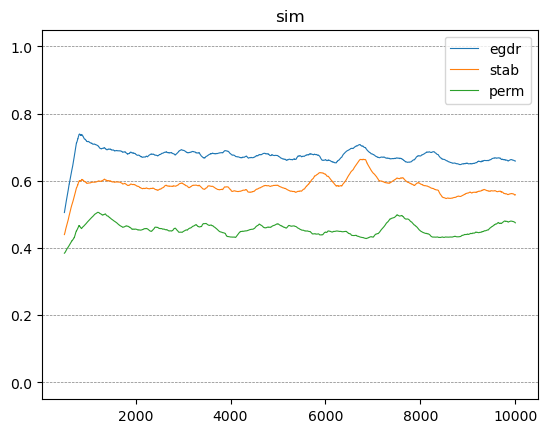

In [10]:
# Sim

window = 0.05
linewidth = 0.8
x = df["order"]

fig, ax = plt.subplots()
for ytick in ax.get_yticks():
    ax.axhline(y=ytick, color='gray', linestyle='--', linewidth=0.5)
    
ad_egfr = {"num": 1, "threshold": 0.66, "scaler": "step", "weight": 1}
ad_stab = {"num": 1, "threshold": 0.55, "scaler": "step", "weight": 1}
ad_perm = {"num": 1, "threshold": 0.43, "scaler": "step", "weight": 1}

y1 = df["egfr_sim"]
# y1 = [scale_objective_value(ad_egfr, v) for v in y1]
plt.plot(x, moving_average(y1, window), label="egdr", linewidth=linewidth)

y2 = df["stab_sim"]
# y2 = [scale_objective_value(ad_stab, v) for v in y2]
plt.plot(x, moving_average(y2, window), label="stab", linewidth=linewidth)

y3 = df["perm_sim"]
# y3 = [scale_objective_value(ad_perm, v) for v in y3]
plt.plot(x, moving_average(y3, window), label="perm", linewidth=linewidth)

plt.title("sim")
plt.legend()
plt.show()